We aim to use python to run automated Technical Analysis in order to generate BUY SELL signals with:

SMA: Simple Moving Average
MACD: Moving Average Convergence Divergence
BB: Bollinger Bands

Modules

In [2]:
pip install pandas_ta

     -------------------------------------- 115.1/115.1 KB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218928 sha256=811e25082116e20bb8d9707921a02aed1218046150587eec4736460c371fc96e
  Stored in directory: c:\users\fluffy\appdata\local\pip\cache\wheels\54\4a\75\06b8e63fce6f6d2c1baae5c208edb18eca128407b0c96e1153
Successfully built pandas_ta
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Fluffy\AppData\Local\Programs\PythonCodingPack\python.exe -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import yfinance as yf

import pandas_datareader.data as web
import pandas_ta as ta

import matplotlib.pyplot as plt
from datetime import date

plt.style.use('fivethirtyeight')
yf.pdr_override()

In [12]:
assets_interest = ['BTC-USD']
start_date = date(2018, 1, 1)
end_date = date.today()
print(end_date)

def get_portfolio(assets = assets_interest, start = start_date, end = end_date):
    data = web.get_data_yahoo(assets, data_source = 'yahoo', start = start, end = end)
    return data

2022-05-17


Ouputing the collected data of assets of interest.

In [13]:
data = get_portfolio(assets_interest)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072
...,...,...,...,...,...,...
2022-05-13,29030.910156,30924.802734,28782.330078,29283.103516,29283.103516,42841124537
2022-05-14,29285.642578,30192.802734,28702.910156,30101.265625,30101.265625,28579868620
2022-05-15,30098.585938,31308.191406,29527.740234,31305.113281,31305.113281,25835372065


Implementing the SMA Strategy:
    Simple Moving Average is a simple indicator known by most traders, this indicator takes an average of Close price for a given period of time to give a smoother trend in order to get a sense the dominating trend direction.

SMA 30 is attributed to the short period.
SMA 100 is the longer period.
The logic of the code is that if the variable position is BUY the next signal may only be a SELL & vice versa.

In [14]:
data['SMA 30'] = ta.sma(data['Close'], 30)
data['SMA 100'] = ta.sma(data['Close'], 100)

def buysell(data):
    buy_signal = []
    sell_signal = []
    position = False

    for i in range(len(data)):
        if data['SMA 30'][i] > data['SMA 100'][i]:
            if position ==  False:
                buy_signal.append(data['Adj Close'][i])
                sell_signal.append(np.nan)
                position = True
            else:
                buy_signal.append(np.nan)
                sell_signal.append(np.nan)
        elif data['SMA 30'][i] < data['SMA 100'][i]:
            if position == True:
                buy_signal.append(np.nan)
                sell_signal.append(data['Adj Close'][i])
                position = False
            else:
                buy_signal.append(np.nan)
                sell_signal.append(np.nan) 
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    return pd.Series([buy_signal, sell_signal])

In [16]:
#Calling our buysell function and storing data before plotting in the next cell

data['Buy_Signals'], data['Sell_Signals'] = buysell(data)
data.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signals,Sell_Signals
Date,,,,,,,,,,
2022-05-13,29030.910156,30924.802734,28782.330078,29283.103516,29283.103516,42841124537,37422.816146,40549.055664,NaN,NaN
2022-05-14,29285.642578,30192.802734,28702.910156,30101.265625,30101.265625,28579868620,37095.007812,40478.522305,NaN,NaN
2022-05-15,30098.585938,31308.191406,29527.740234,31305.113281,31305.113281,25835372065,36786.729427,40376.564688,NaN,NaN
2022-05-16,31304.375000,31305.341797,29251.884766,29862.917969,29862.917969,32613897286,36434.677214,40260.782227,NaN,NaN
2022-05-17,29844.753906,30670.640625,29577.351562,30458.269531,30458.269531,29018382336,36126.054427,40141.240586,NaN,NaN


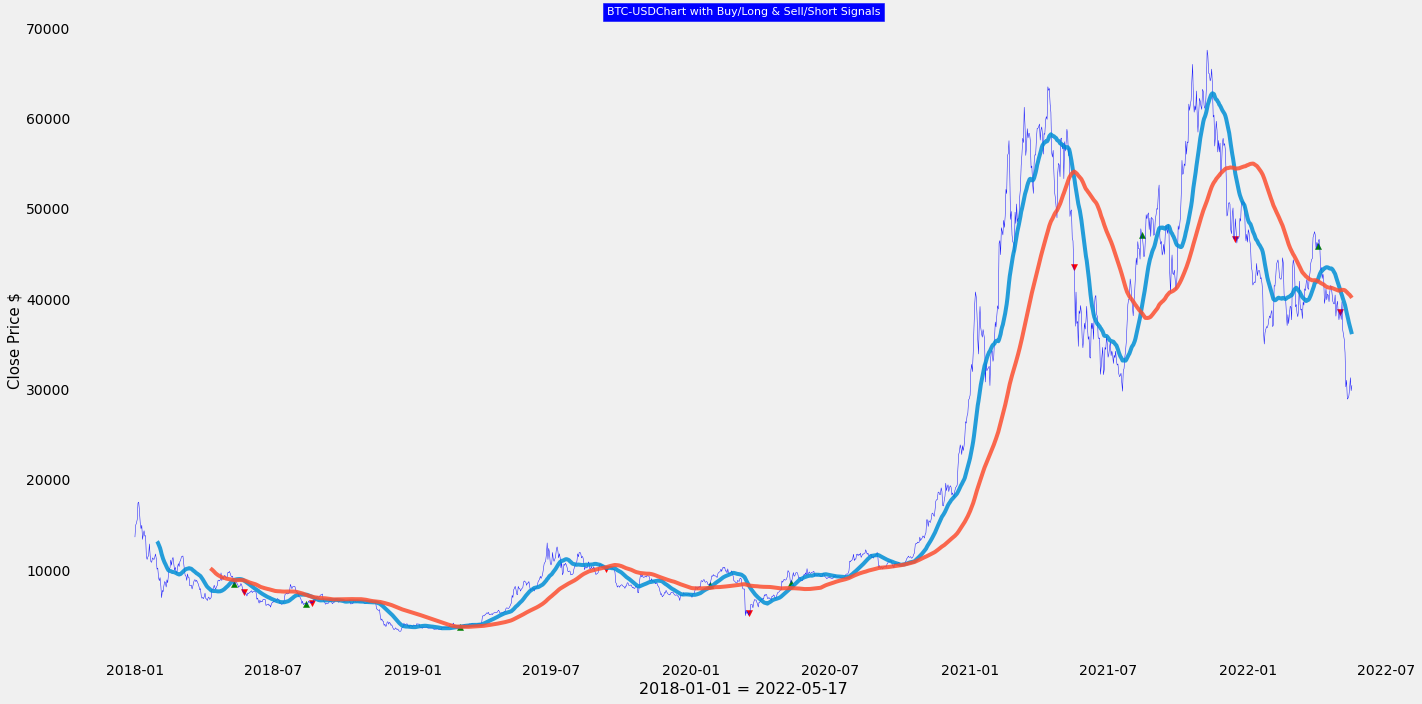

In [20]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(data['Adj Close'], label = assets_interest[0], linewidth = 0.5, color = 'blue', alpha = 0.9)
ax.plot(data['SMA 30'], label ='SMA 30', alpha = 0.85)
ax.plot(data['SMA 100'], label = 'SMA 100', alpha = 0.85)

ax.scatter(data.index, data['Buy_Signals'], label = 'BUY', marker = '^', color = 'green', alpha = 1)
ax.scatter(data.index, data['Sell_Signals'], label = 'SELL', marker = 'v', color = 'red', alpha = 1)
ax.set_title(assets_interest[0] + "Chart with Buy/Long & Sell/Short Signals", fontsize = 11, backgroundcolor = 'blue', color = 'white')
ax.set_xlabel(f'{start_date} = {end_date}', fontsize = 16)
ax.set_ylabel(f'Close Price $', fontsize = 15)
legend = ax.legend
ax.grid()
plt.tight_layout()
plt.show()